In [1]:
import glob

import os
import scipy.stats

In [2]:
import sys
sys.path.append('/Users/rsingh/Oyla/Work/our_python_dev/')

In [3]:
import open3d as o3d
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline
from oyla.mvc.utils import *

In [4]:
from skimage.segmentation import felzenszwalb

In [5]:
dir_path='/Users/rsingh/Oyla Dropbox/Oyla/02 Technical/'+'10 Data/44x33/27_Jan_data_January_27_09_08_06//'

In [6]:
filter_parameters = read_csv_parameters(dir_path+"/filter_params.csv")
#print(filter_parameters)
filter_params = {}
for k in filter_parameters['filter_cmd'].keys():
        #print(parameters['filter_cmd'][k][self.epoch_number])
        try:
                filter_params[k] = int(filter_parameters['filter_cmd'][k][0])
                #parameters['filter_cmd'][k][0] = filter_parameters['filter_cmd'][k][0]
                if int(filter_parameters['filter_cmd'][k][0]) == 1 and 'iterations' not in k and 'size' not in k:
                    print(k)
        except ValueError:
                pass
#print(filter_params)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/rsingh/Oyla Dropbox/Oyla/02 Technical/10 Data/44x33/27_Jan_data_January_27_09_08_06///filter_params.csv'

In [7]:
filter_parameters['filter_cmd']['guided_filter_std_range']

NameError: name 'filter_parameters' is not defined

In [11]:
pcd = o3d.io.read_point_cloud(os.path.join(dir_path,'kitti_r1200-900-44x33/')+'/3d/oyla_30.xyz',format='xyz')
depth_img = plt.imread(dir_path+'/kitti_r1200-900-44x33/2d/depth/oyla_26.png')


736


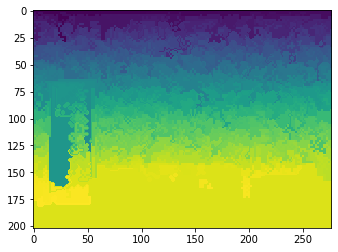

In [12]:
_fez = felzenszwalb(depth_img[:,:,0],multichannel=False,min_size=20,sigma=0.4)
print(np.max(np.unique(_fez)))
plt.imshow((_fez))

131


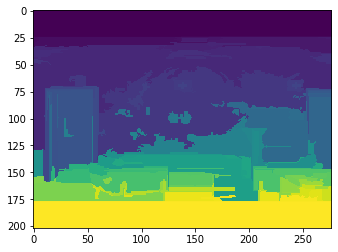

In [20]:
_fez = felzenszwalb(rgb_img[:,:,0],multichannel=False,min_size=20,sigma=0.4,scale=100)
print(np.max(np.unique(_fez)))
plt.imshow((_fez))

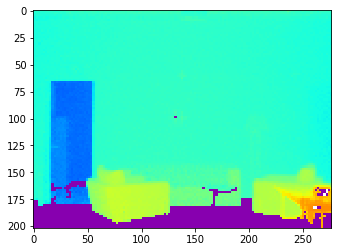

In [19]:
plt.imshow(depth_img)

In [22]:
I = plt.imread('/Volumes/Samsung_T5/Oyla Dropbox/Oyla/02 Technical/10 Data/44x33/02_Jan_data_January_02_17_04_03/kitti_r1000-800-44x33/2d/depth/oyla_16.png')
J = plt.imread('/Volumes/Samsung_T5/Oyla Dropbox/Oyla/02 Technical/10 Data/44x33/02_Jan_data_January_02_17_04_03/filtered_data_January_23_21_32_28/kitti_r1000-800-44x33//2d/depth/oyla_16.png')

92


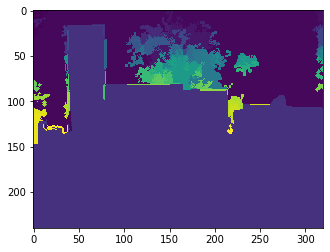

In [23]:
_fez = felzenszwalb(np.flipud(I[:,:,0]),multichannel=False,min_size=20,sigma=0.4)
print(np.max(np.unique(_fez)))
plt.imshow((_fez))

73


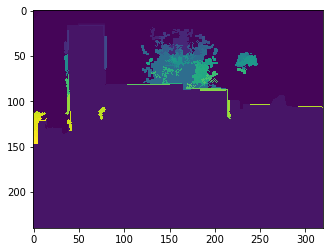

In [24]:
_fez = felzenszwalb(J[:,:,0],multichannel=False,min_size=20,sigma=0.4)
print(np.max(np.unique(_fez)))
plt.imshow((_fez))

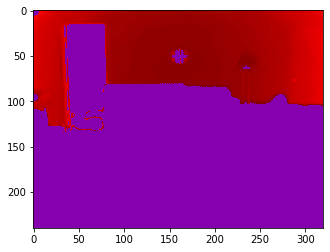

In [120]:
plt.imshow((depth_img))

In [121]:
print(np.asarray(pcd.points))

[[-200.79642 -147.77972  893.0025 ]
 [-200.79533 -145.29056  892.9998 ]
 [-200.73161 -142.75908  892.8421 ]
 ...
 [ 516.8777    80.87966  889.4429 ]
 [ 509.96567   83.89626  872.21606]
 [ 498.39856   87.27342  843.3875 ]]


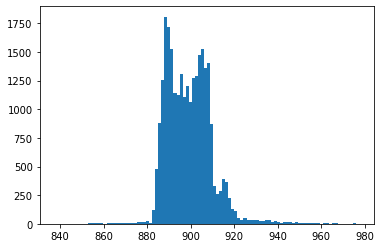

In [122]:
z = np.asarray(pcd.points)[:,2]
_=plt.hist(z,100)

In [123]:
print(np.count_nonzero(z<850))
print(scipy.stats.skew(z))
print(scipy.stats.kurtosis(z))
print(np.mean(z))
print(np.std(z))
print(scipy.stats.kurtosis(z)-scipy.stats.skew(z)*scipy.stats.skew(z))

12
1.0651333632153572
4.576704725241263
899.3290380934433
10.579982138198439
3.442195643806805


In [124]:
o3d.visualization.draw_geometries([pcd])

In [75]:
pcd.paint_uniform_color([0.5, 0.5, 0.5])

geometry::PointCloud with 27664 points.

In [76]:
outlier_cloud = pcd
inlier_clouds = []
n = 1
for i in range(n):
    print(outlier_cloud)
    plane_model, _inliers = outlier_cloud.segment_plane(distance_threshold=1.5,
                                                 ransac_n=3,
                                                 num_iterations=100)
    print(len(_inliers))

    inlier_cloud = outlier_cloud.select_down_sample(_inliers)
    inlier_cloud.paint_uniform_color(cm.get_cmap('jet')(i*255//n)[:3])
    inlier_clouds.append(inlier_cloud)
    outlier_cloud = outlier_cloud.select_down_sample(_inliers, invert=True)
    print(outlier_cloud)

inlier_clouds.append(outlier_cloud)


geometry::PointCloud with 27664 points.
4826
geometry::PointCloud with 22838 points.


In [23]:
outlier_cloud = pcd
inlier_clouds = []
n = 500
for i in range(n):
    print(outlier_cloud)
    plane_model, _inliers = outlier_cloud.segment_plane(distance_threshold=0.5,
                                                 ransac_n=30,
                                                 num_iterations=100)
    print(len(_inliers))

    inlier_cloud = outlier_cloud.select_down_sample(_inliers)
    inlier_cloud.paint_uniform_color(cm.get_cmap('jet')(i*255//n)[:3])
    inlier_clouds.append(inlier_cloud)
    outlier_cloud = outlier_cloud.select_down_sample(_inliers, invert=True)
    print(outlier_cloud)
    if np.asarray(outlier_cloud.points).shape[0]<100:
        print(i)
        break
inlier_clouds.append(outlier_cloud)


geometry::PointCloud with 26799 points.
3143
geometry::PointCloud with 23656 points.
geometry::PointCloud with 23656 points.
2597
geometry::PointCloud with 21059 points.
geometry::PointCloud with 21059 points.
2163
geometry::PointCloud with 18896 points.
geometry::PointCloud with 18896 points.
1582
geometry::PointCloud with 17314 points.
geometry::PointCloud with 17314 points.
1448
geometry::PointCloud with 15866 points.
geometry::PointCloud with 15866 points.
1298
geometry::PointCloud with 14568 points.
geometry::PointCloud with 14568 points.
1058
geometry::PointCloud with 13510 points.
geometry::PointCloud with 13510 points.
1023
geometry::PointCloud with 12487 points.
geometry::PointCloud with 12487 points.
914
geometry::PointCloud with 11573 points.
geometry::PointCloud with 11573 points.
597
geometry::PointCloud with 10976 points.
geometry::PointCloud with 10976 points.
598
geometry::PointCloud with 10378 points.
geometry::PointCloud with 10378 points.
715
geometry::PointCloud wit

In [24]:
i

113

In [77]:
o3d.visualization.draw_geometries(inlier_clouds)

In [89]:
dirs = ['/Users/rsingh/Oyla Dropbox/Oyla/02 Technical/10 Data/44x33/02_Jan_data_January_02_17_04_03/']
#       '/Users/rsingh/Oyla Dropbox/Oyla/02 Technical/10 Data/10percentTargetTests/distamp_refboards_data_october_11_18_36_49/']
#dirs
#dirs.reverse()
#dirs = [dirs[0]]
dirs.extend(glob.glob(dirs[0]+'/filtered_data_January_2*'))
print(dirs)

['/Users/rsingh/Oyla Dropbox/Oyla/02 Technical/10 Data/44x33/02_Jan_data_January_02_17_04_03/', '/Users/rsingh/Oyla Dropbox/Oyla/02 Technical/10 Data/44x33/02_Jan_data_January_02_17_04_03/filtered_data_January_23_21_16_53', '/Users/rsingh/Oyla Dropbox/Oyla/02 Technical/10 Data/44x33/02_Jan_data_January_02_17_04_03/filtered_data_January_23_21_17_49', '/Users/rsingh/Oyla Dropbox/Oyla/02 Technical/10 Data/44x33/02_Jan_data_January_02_17_04_03/filtered_data_January_23_21_30_53', '/Users/rsingh/Oyla Dropbox/Oyla/02 Technical/10 Data/44x33/02_Jan_data_January_02_17_04_03/filtered_data_January_23_21_32_28', '/Users/rsingh/Oyla Dropbox/Oyla/02 Technical/10 Data/44x33/02_Jan_data_January_02_17_04_03/filtered_data_January_24_10_53_23', '/Users/rsingh/Oyla Dropbox/Oyla/02 Technical/10 Data/44x33/02_Jan_data_January_02_17_04_03/filtered_data_January_24_15_58_29']


In [90]:
results = {}
thresholds = [0.1,0.25,0.5,1,2,5]
for dir_path in dirs:
    print(dir_path)
    results[dir_path] = {}
    results[dir_path]["filter_str"] = ""
    if os.path.exists(dir_path+"/filter_params.csv"):
        filter_parameters = read_csv_parameters(dir_path+"/filter_params.csv")
        #print(filter_parameters)
        filter_params = {}
        for k in filter_parameters['filter_cmd'].keys():
            #print(parameters['filter_cmd'][k][self.epoch_number])
            try:
                    filter_params[k] = int(filter_parameters['filter_cmd'][k][0])
                    #parameters['filter_cmd'][k][0] = filter_parameters['filter_cmd'][k][0]
                    if int(filter_parameters['filter_cmd'][k][0]) == 1 and 'iterations' not in k and 'size' not in k:
                        results[dir_path]["filter_str"] += k+' '
                    #results[dir_path]["filter_str"] = filter_parameters['filter_cmd']['guided_filter_size'][0]+' '+filter_parameters['filter_cmd']['guided_filter_iterations'][0]+' '+filter_parameters['filter_cmd']['guided_filter_std_range'][0]
            except ValueError:
                    pass
    else:
        #print(dir_path.split('/')[-2])
        results[dir_path]["filter_str"] = dir_path.split('/')[-2]
    if 'distamp' in dir_path:
        pcd = o3d.io.read_point_cloud(dir_path+'/kitti_r1000-850-90x70/3d/oyla_26.xyz',format='xyz')
        depth_img = plt.imread(dir_path+'/kitti_r1000-850-90x70/2d/depth/oyla_26.png')
    else:
        if os.path.exists(dir_path+'/kitti_r1000-800-44x33/3d/oyla_26.xyz'):
            pcd = o3d.io.read_point_cloud(dir_path+'/kitti_r1000-800-44x33/3d/oyla_26.xyz',format='xyz')
            depth_img = plt.imread(dir_path+'/kitti_r1000-800-44x33/2d/depth/oyla_26.png')
        elif os.path.exists(dir_path+'/kitti_r1000-900-44x33/3d/oyla_26.xyz'):
            pcd = o3d.io.read_point_cloud(dir_path+'/kitti_r1000-900-44x33/3d/oyla_26.xyz',format='xyz')
            depth_img = plt.imread(dir_path+'/kitti_r1000-900-44x33/2d/depth/oyla_26.png')
        else:
            continue
#     if 'distamp' in dir_path:
#         pcd = o3d.io.read_point_cloud(dir_path+'/kitti_r600-400-90x70-250-0-200-0/3d/oyla_26.xyz',format='xyz')
#     else:
#         pcd = o3d.io.read_point_cloud(dir_path+'/kitti_r650-450-44x33-250-0-200-0//3d/oyla_26.xyz',format='xyz')
    z = np.asarray(pcd.points)[:,2]
    results[dir_path]["num_points"] = len(z) 
    results[dir_path]["mean_z"] = np.mean(z)
    results[dir_path]["std_z"] = np.std(z)
    results[dir_path]["skew"] = scipy.stats.skew(z)
    results[dir_path]["kurtosis"] = scipy.stats.kurtosis(z)
    results[dir_path]['fitted_points'] = []
    results[dir_path]['fitted_planes'] = []
    _fez = felzenszwalb(depth_img[:,:,0],multichannel=False,min_size=20,sigma=0.4)
    results[dir_path]['number_segments'] = np.max(np.unique(_fez))
    for t in thresholds:
        
        outlier_cloud = pcd
        n = 200
        for i in range(n):
            #print(outlier_cloud)
            plane_model, _inliers = outlier_cloud.segment_plane(distance_threshold=t,
                                                         ransac_n=3,
                                                         num_iterations=100)
            #print(len(_inliers))

            inlier_cloud = outlier_cloud.select_down_sample(_inliers)
            inlier_cloud.paint_uniform_color(cm.get_cmap('jet')(i*255//n)[:3])
            #inlier_clouds.append(inlier_cloud)
            outlier_cloud = outlier_cloud.select_down_sample(_inliers, invert=True)
            #print(outlier_cloud)
            
            if i==0:
                single_fit = len(_inliers)
                results[dir_path]['z'] = np.asarray(pcd.points)[:,2]
            if np.asarray(outlier_cloud.points).shape[0]<1000:
                print(i)
                break
#         plane_model, _inliers = pcd.segment_plane(distance_threshold=t,
#                                                      ransac_n=3,
#                                                      num_iterations=100)
        results[dir_path]['fitted_planes'].append(i)
        results[dir_path]['fitted_points'].append(single_fit)

/Users/rsingh/Oyla Dropbox/Oyla/02 Technical/10 Data/44x33/02_Jan_data_January_02_17_04_03/
131
64
30
9
/Users/rsingh/Oyla Dropbox/Oyla/02 Technical/10 Data/44x33/02_Jan_data_January_02_17_04_03/filtered_data_January_23_21_16_53
dict_keys(['Section', 'Type', 'Key', 'Argument Format', 'Value', 'Command Group', 'Description'])
151
83
40
20
6
/Users/rsingh/Oyla Dropbox/Oyla/02 Technical/10 Data/44x33/02_Jan_data_January_02_17_04_03/filtered_data_January_23_21_17_49
dict_keys(['Section', 'Type', 'Key', 'Argument Format', 'Value', 'Command Group', 'Description'])
117
57
27
12
4
/Users/rsingh/Oyla Dropbox/Oyla/02 Technical/10 Data/44x33/02_Jan_data_January_02_17_04_03/filtered_data_January_23_21_30_53
dict_keys(['Section', 'Type', 'Key', 'Argument Format', 'Value', 'Command Group', 'Description'])
123
58
27
9
/Users/rsingh/Oyla Dropbox/Oyla/02 Technical/10 Data/44x33/02_Jan_data_January_02_17_04_03/filtered_data_January_23_21_32_28
dict_keys(['Section', 'Type', 'Key', 'Argument Format', 'Val

In [91]:
results

{'/Users/rsingh/Oyla Dropbox/Oyla/02 Technical/10 Data/44x33/02_Jan_data_January_02_17_04_03/': {'filter_str': '02_Jan_data_January_02_17_04_03',
  'num_points': 28032,
  'mean_z': 897.9367439922232,
  'std_z': 16.602504892208138,
  'skew': -2.465994232617561,
  'kurtosis': 13.550233486554895,
  'fitted_points': [346, 809, 1597, 3231, 6443, 14529],
  'fitted_planes': [199, 199, 131, 64, 30, 9],
  'number_segments': 108,
  'z': array([765.66736, 830.40125, 788.8861 , ..., 888.18396, 891.6303 ,
         880.7569 ])},
 '/Users/rsingh/Oyla Dropbox/Oyla/02 Technical/10 Data/44x33/02_Jan_data_January_02_17_04_03/filtered_data_January_23_21_16_53': {'filter_str': 'median_filter ',
  'num_points': 28295,
  'mean_z': 898.0443559310833,
  'std_z': 15.990115328332891,
  'skew': -2.9019899309722947,
  'kurtosis': 16.738709181102866,
  'fitted_points': [790, 1860, 3776, 7014, 12934, 21272],
  'fitted_planes': [199, 151, 83, 40, 20, 6],
  'number_segments': 60,
  'z': array([765.66736, 788.76556, 79

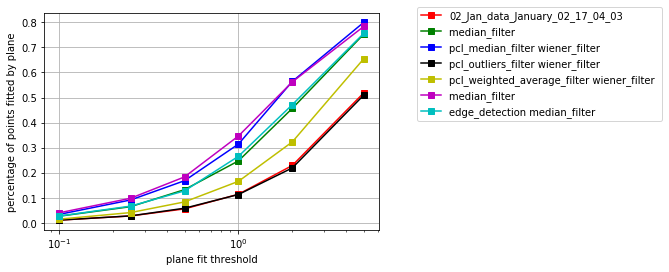

In [92]:
legend = []
legs = ['r-s','g-s','b-s','k-s','y-s','m-s','c-s','r-o','g-o','b-o','k-o','y-o','m-o','c-o']

for i,k in enumerate(results.keys()):
    if ''  in results[k]['filter_str']:
        plt.semilogx(thresholds,np.asarray(results[k]['fitted_points'])/results[k]['num_points'],legs[i])
        legend.append(results[k]['filter_str'])
lgd = plt.legend(legend,bbox_to_anchor=(1.1, 1.05))
plt.grid('on')
plt.ylabel('percentage of points fitted by plane')
plt.xlabel('plane fit threshold')
plt.savefig('/Users/rsingh/Downloads/test.png',box_extra_artists=(lgd,), bbox_inches='tight')

[199, 199, 131, 64, 30, 9] 02_Jan_data_January_02_17_04_03
[199, 151, 83, 40, 20, 6] median_filter 
[199, 117, 57, 27, 12, 4] pcl_median_filter wiener_filter 
[199, 199, 123, 58, 27, 9] pcl_outliers_filter wiener_filter 
[199, 199, 111, 55, 22, 6] pcl_weighted_average_filter wiener_filter 
[199, 130, 66, 31, 15, 5] median_filter 
[199, 130, 65, 31, 13, 5] edge_detection median_filter 


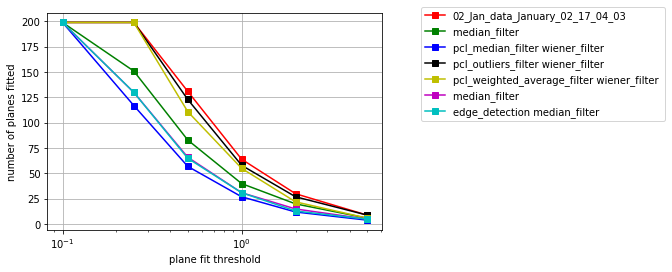

In [93]:
legs = ['r-s','g-s','b-s','k-s','y-s','m-s','c-s','r-o','g-o','b-o','k-o','y-o','m-o','c-o']
legend = []
for i,k in enumerate(results.keys()):
    if ''  in results[k]['filter_str']:
        plt.semilogx(thresholds,np.asarray(results[k]['fitted_planes']),legs[i])
        print(results[k]['fitted_planes'],results[k]['filter_str'])
        legend.append(results[k]['filter_str'])
lgd = plt.legend(legend,bbox_to_anchor=(1.1, 1.05))
plt.grid('on')
plt.ylabel('number of planes fitted')
plt.xlabel('plane fit threshold')
plt.savefig('/Users/rsingh/Downloads/test1.png',box_extra_artists=(lgd,), bbox_inches='tight')

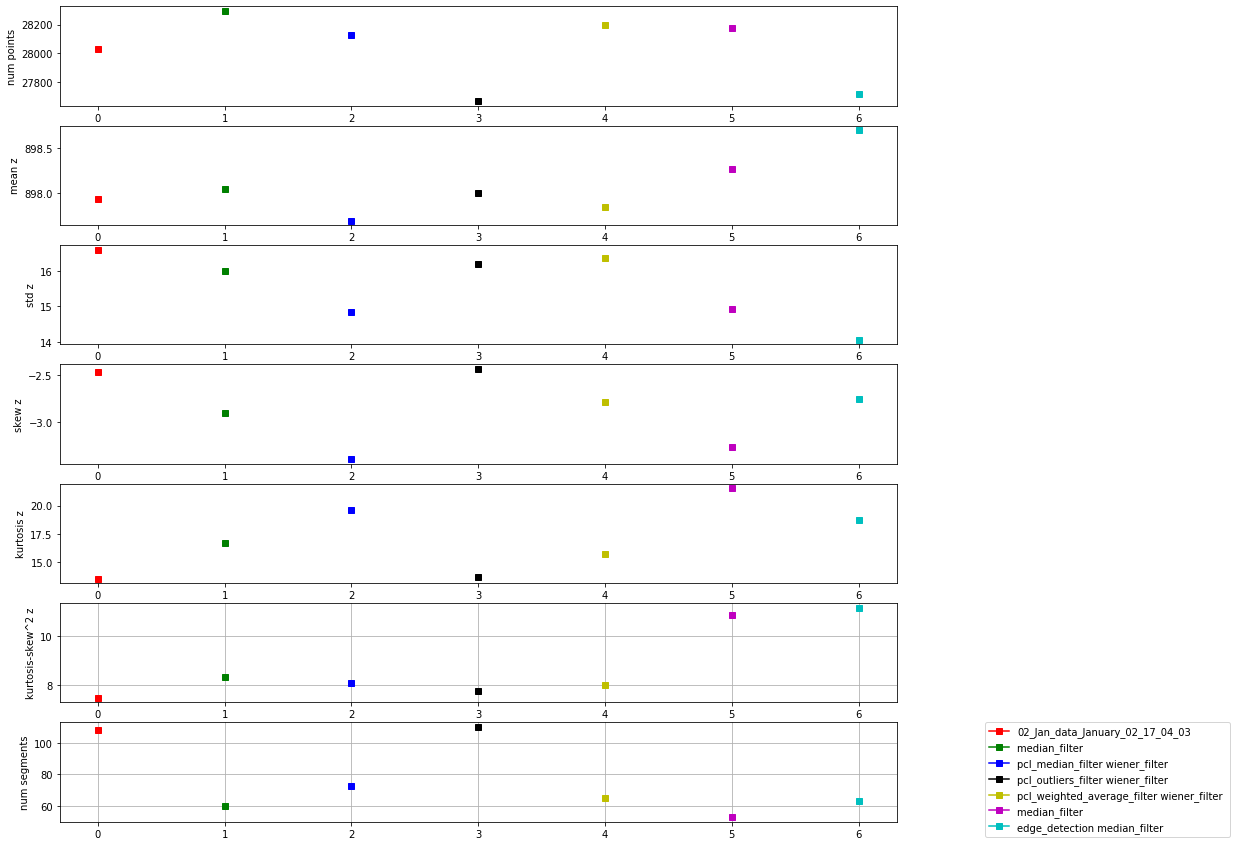

In [94]:
r = []
f, axs = plt.subplots(7,1,figsize=(15,15))
legs = ['r-s','g-s','b-s','k-s','y-s','m-s','c-s','r-o','g-o','b-o','k-o','y-o','m-o','c-o']

for i,k in enumerate(results.keys()):
    axs[0].plot(i,results[k]['num_points'],legs[i])
    axs[0].set_ylabel('num points')
    axs[1].plot(i,results[k]['mean_z'],legs[i])
    axs[1].set_ylabel('mean z')
    axs[2].plot(i,results[k]['std_z'],legs[i])
    axs[2].set_ylabel('std z')
    axs[3].plot(i,results[k]['skew'],legs[i])
    axs[3].set_ylabel('skew z')
    axs[4].plot(i,results[k]['kurtosis'],legs[i])
    axs[4].set_ylabel('kurtosis z')
    axs[5].plot(i,results[k]['kurtosis']-np.power(results[k]['skew'],2),legs[i])
    axs[5].set_ylabel('kurtosis-skew^2 z')
    axs[5].grid('on')
    axs[6].plot(i,results[k]['number_segments'],legs[i])
    axs[6].set_ylabel('num segments')
    axs[6].grid('on')
lgd = axs[6].legend(legend,bbox_to_anchor=(1.1, 1.05))
plt.savefig('/Users/rsingh/Downloads/test2.png',box_extra_artists=(lgd,), bbox_inches='tight')

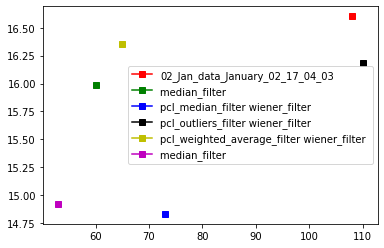

In [140]:
for i,k in enumerate(results.keys()):
    if i!=6:
        plt.plot(results[k]['number_segments'],results[k]['std_z'],legs[i])
plt.legend(legend)

In [142]:
np.std([2,2.1,2.2])

0.08164965809277268

/Users/rsingh/Oyla Dropbox/Oyla/02 Technical/10 Data/44x33/02_Jan_data_January_02_17_04_03/
/Users/rsingh/Oyla Dropbox/Oyla/02 Technical/10 Data/44x33/02_Jan_data_January_02_17_04_03/filtered_data_January_23_21_16_53
/Users/rsingh/Oyla Dropbox/Oyla/02 Technical/10 Data/44x33/02_Jan_data_January_02_17_04_03/filtered_data_January_23_21_17_49
/Users/rsingh/Oyla Dropbox/Oyla/02 Technical/10 Data/44x33/02_Jan_data_January_02_17_04_03/filtered_data_January_23_21_30_53
/Users/rsingh/Oyla Dropbox/Oyla/02 Technical/10 Data/44x33/02_Jan_data_January_02_17_04_03/filtered_data_January_23_21_32_28
/Users/rsingh/Oyla Dropbox/Oyla/02 Technical/10 Data/44x33/02_Jan_data_January_02_17_04_03/filtered_data_January_24_10_53_23
/Users/rsingh/Oyla Dropbox/Oyla/02 Technical/10 Data/44x33/02_Jan_data_January_02_17_04_03/filtered_data_January_24_15_58_29


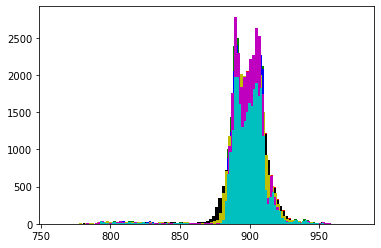

In [95]:
color = ['r','g','b','k','y','m','c','r','g','b','k','y','m','c',]
for i,k in enumerate(results.keys()):
    _=plt.hist(results[k]['z'],100,color=color[i])
    print(k)
plt.savefig('/Users/rsingh/Downloads/test3.png')

In [21]:
img = plt.imread('/Users/rsingh/Downloads/carpet_01_noflash.jpg')
_fez = felzenszwalb(img[:,:,0],multichannel=False,min_size=50,sigma=1.8,scale = 100)


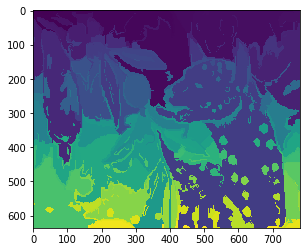

In [22]:
plt.imshow(_fez)

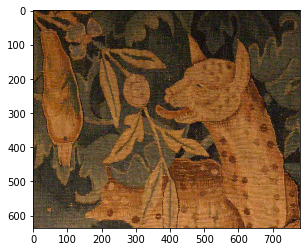

In [18]:
plt.imshow(img)